In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
raw_data=pd.read_csv('./survey.csv')
raw_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [18]:
list(raw_data.columns)

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [10]:
def mental_health(df, agg_col):

    mental_health =df.groupby('Genre')[agg_col].sum().reset_index()
    mental_health = best_seller_df.sort_values(agg_col, ascending=False)
    return mental_health

best_selling_na = best_seller(raw_data, "NA_Sales")
best_selling_eu = best_seller(raw_data, "EU_Sales")
best_selling_jp = best_seller(raw_data, "JP_Sales")

In [11]:
print("The Best Selling genre in NA is {}".format(best_selling_na.iloc[0,0]))
print("The Best Selling genre in EU is {}".format(best_selling_eu.iloc[0,0]))
print("The Best Selling genre in JP is {}".format(best_selling_jp.iloc[0,0]))

The Best Selling genre in NA is Shooter
The Best Selling genre in EU is Shooter
The Best Selling genre in JP is Role-Playing


In [12]:
#Best Selling Platform for NA,EU AND JP
def best_seller(df, agg_col):

    best_seller_df =df.groupby('Platform')[agg_col].sum().reset_index()
    best_seller_df = best_seller_df.sort_values(agg_col, ascending=False)
    return best_seller_df

best_selling_na = best_seller(raw_data, "NA_Sales")
best_selling_eu = best_seller(raw_data, "EU_Sales")
best_selling_jp = best_seller(raw_data, "JP_Sales")

In [13]:
print("The Best Selling Platform for NA is {}".format(best_selling_na.iloc[0,0]))
print("The Best Selling Platform for EU is {}".format(best_selling_eu.iloc[0,0]))
print("The Best Selling Platform for JP is {}".format(best_selling_jp.iloc[0,0]))

The Best Selling Platform for NA is Wii
The Best Selling Platform for EU is Wii
The Best Selling Platform for JP is DS


In [14]:
call_of_duty_sales =raw_data[raw_data['Name'].str.contains("Call of Duty")]

call_of_duty_sales["Platform"].unique()

array(['X360', 'PS4', 'PS3'], dtype=object)

In [15]:
COD =call_of_duty_sales.groupby('Platform')['NA_Sales'].sum().reset_index()
COD.head(20)

,Platform,NA_Sales
0,PS3,25.59
1,PS4,8.57
2,X360,52.89


Text(0, 0.5, 'sales')

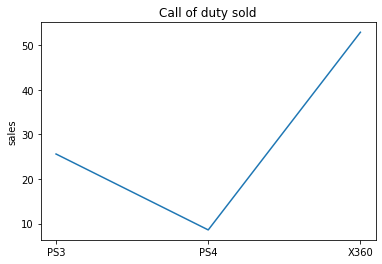

In [16]:
plt.plot(COD.NA_Sales, label='NA_Sales')
plat_x=['PS3','PS4','X360']
plt.title('Call of duty sold')
plt.xticks([0,1,2],plat_x)
plt.ylabel('sales')